**Import Required Libraries & Custom Functions**

In [32]:
import os
import sys

os.chdir(r'C:\Users\Admin\OneDrive\Área de Trabalho\IronHAck Labs\Final Project - IronHack')

# Add 'scripts' folder to the Python path
sys.path.append(os.path.join(os.getcwd(), 'scripts'))

# Now import custom functions from the scripts
from data_cleaning import identify_data_quality_issues, comprehensive_data_cleaning, impute_missing_values
from feature_engineering import add_technical_indicators, add_lagged_features
from model_training import train_linear_regression, evaluate_model
from trading_strategy import trading_strategy


In [33]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom functions from scripts
from data_cleaning import identify_data_quality_issues, comprehensive_data_cleaning, impute_missing_values
from feature_engineering import add_technical_indicators, add_lagged_features
from model_training import train_linear_regression, evaluate_model
from trading_strategy import trading_strategy


# Import scikit-learn libraries for model splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


**Load Data**

Load the data for each cryptocurrency and store it in a dictionary

In [39]:
# Define symbols for the coins you are analyzing
symbols = ['BTC/USDT', 'ETH/USDT', 'ADA/USDT', 'XRP/USDT', 'LTC/USDT', 'DOGE/USDT']
timeframe = '4h'  # used timeframe
# Load the data for each coin into a dictionary
data_dict = {}
for symbol in symbols:
    data_dict[symbol] = pd.read_csv(f'data/{symbol.replace("/", "_")}_{timeframe}.csv')

# Show one of the dataframes (e.g., BTC/USDT) to verify
data_dict['BTC/USDT'].head()


,timestamp,open,high,low,close,volume
0,2022-01-01 00:00:00,46216.93,46949.99,46208.37,46813.20,3495.20465
1,2022-01-01 04:00:00,46813.21,47555.55,46591.23,47194.73,3522.79888
2,2022-01-01 08:00:00,47194.73,47344.69,46715.39,46758.87,2729.67811
3,2022-01-01 12:00:00,46758.87,47491.14,46756.30,47219.04,3055.90946
4,2022-01-01 16:00:00,47219.04,47954.63,47186.07,47329.78,4061.67681


**Data Cleaning**

In [40]:
# Clean data for all coins
for symbol, df in data_dict.items():
    print(f"Cleaning data for {symbol}...")
    identify_data_quality_issues(df)
    df = comprehensive_data_cleaning(df)
    df = impute_missing_values(df)
    data_dict[symbol] = df  # Store cleaned data back into the dictionary


Cleaning data for BTC/USDT...
Checking for missing values...
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Checking for duplicates...
0
Cleaning data...
Imputing missing values using ffill method.
Cleaning data for ETH/USDT...
Checking for missing values...
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Checking for duplicates...
0
Cleaning data...
Imputing missing values using ffill method.
Cleaning data for ADA/USDT...
Checking for missing values...
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Checking for duplicates...
0
Cleaning data...
Imputing missing values using ffill method.
Cleaning data for XRP/USDT...
Checking for missing values...
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

Checking for duplicates...
0
Cleaning data...
Imputing missing values 

C:\Users\Admin\OneDrive\Área de Trabalho\IronHAck Labs\Final Project - IronHack\scripts\data_cleaning.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Admin\OneDrive\Área de Trabalho\IronHAck Labs\Final Project - IronHack\scripts\data_cleaning.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
C:\Users\Admin\OneDrive\Área de Trabalho\IronHAck Labs\Final Project - IronHack\scripts\data_cleaning.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


**Feature Engineering**

In [41]:
n_lags = 4  # Define how many lagged features you want to add

# Add technical indicators and lagged features for all coins
for symbol, df in data_dict.items():
    print(f"Adding features for {symbol}...")
    df = add_technical_indicators(df)  # Add technical indicators
    df = add_lagged_features(df, 'close', n_lags=n_lags)  # Add lagged features
    data_dict[symbol] = df  # Store the engineered data back


Adding features for BTC/USDT...
Adding technical indicators...
Adding features for ETH/USDT...
Adding technical indicators...
Adding features for ADA/USDT...
Adding technical indicators...
Adding features for XRP/USDT...
Adding technical indicators...
Adding features for LTC/USDT...
Adding technical indicators...
Adding features for DOGE/USDT...
Adding technical indicators...


**Train/Test Split and Scaling**

In [42]:
# Store train/test data for each coin in a dictionary
other_coins_data = {}
scalers = {}

# Train/Test Split for each coin
for symbol, df in data_dict.items():
    print(f"Splitting data for {symbol}...")

    # Remove rows with NaNs (caused by lagging or technical indicators)
    df.dropna(inplace=True)

    # Define features (everything except 'close') and target ('close')
    features = df.drop(columns=['close', 'timestamp'])
    target = df['close']
    
    # Scale the features and the target
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=False)

    # Store the split data and scaler for each coin
    other_coins_data[symbol] = (X_train, X_test, y_train, y_test)
    scalers[symbol] = scaler


Splitting data for BTC/USDT...
Splitting data for ETH/USDT...
Splitting data for ADA/USDT...
Splitting data for XRP/USDT...
Splitting data for LTC/USDT...
Splitting data for DOGE/USDT...


**Model Training & Evaluation**

In [43]:
# Train and evaluate models for each coin
for symbol, (X_train, X_test, y_train, y_test) in other_coins_data.items():
    print(f"Training Linear Regression model for {symbol}...")
    
    # Train the model
    lr_model = train_linear_regression(X_train, y_train)

    # Make predictions
    y_pred = lr_model.predict(X_test)

    # Evaluate the model
    evaluation_results = evaluate_model(y_test, y_pred)
    print(f"{symbol} Evaluation Results: {evaluation_results}")


Training Linear Regression model for BTC/USDT...
BTC/USDT Evaluation Results: {'MSE': 2.94366833175762e-05, 'RMSE': 0.005425558341551236, 'MAE': 0.0037858329300079333, 'R-squared': 0.9949319304351986}
Training Linear Regression model for ETH/USDT...
ETH/USDT Evaluation Results: {'MSE': 3.451915343940112e-05, 'RMSE': 0.005875300285040852, 'MAE': 0.004030327125231764, 'R-squared': 0.9981069371350888}
Training Linear Regression model for ADA/USDT...
ADA/USDT Evaluation Results: {'MSE': 7.6129752589797965e-06, 'RMSE': 0.0027591620573970996, 'MAE': 0.0018382291690017274, 'R-squared': 0.9989885082845166}
Training Linear Regression model for XRP/USDT...
XRP/USDT Evaluation Results: {'MSE': 3.620591982540581e-05, 'RMSE': 0.006017135516622989, 'MAE': 0.004138889438344638, 'R-squared': 0.9960080706346977}
Training Linear Regression model for LTC/USDT...
LTC/USDT Evaluation Results: {'MSE': 2.3633809839371126e-05, 'RMSE': 0.0048614616978200215, 'MAE': 0.0033478246350780246, 'R-squared': 0.9977898

**Apply Trading Strategy**

In [44]:
# Apply trading strategy for each coin
strategy_results = {}

initial_balance = 1000  # Define starting capital

for symbol, (X_train, X_test, y_train, y_test) in other_coins_data.items():
    print(f"Applying trading strategy for {symbol}...")

    # Train the model and make predictions
    lr_model = train_linear_regression(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    # Inverse transform the predictions and target to their original scale
    y_pred_original = scalers[symbol].inverse_transform(y_pred.reshape(-1, 1))
    y_test_original = scalers[symbol].inverse_transform(y_test.reshape(-1, 1))

    # Create a DataFrame for the test data
    df_test = pd.DataFrame({
        'close': y_test_original.flatten(),
        'predicted_close': y_pred_original.flatten()
    })

    # Apply the trading strategy
    df_test, final_portfolio_value = trading_strategy(df_test, y_pred_original, initial_balance)

    strategy_results[symbol] = {
        'final_portfolio_value': final_portfolio_value,
        'df': df_test
    }

    print(f"Final portfolio value for {symbol}: ${final_portfolio_value:.2f}")


Applying trading strategy for BTC/USDT...
Final portfolio value for BTC/USDT: $1412.49
Applying trading strategy for ETH/USDT...
Final portfolio value for ETH/USDT: $850.04
Applying trading strategy for ADA/USDT...
Final portfolio value for ADA/USDT: $851.14
Applying trading strategy for XRP/USDT...
Final portfolio value for XRP/USDT: $1000.51
Applying trading strategy for LTC/USDT...
Final portfolio value for LTC/USDT: $899.52
Applying trading strategy for DOGE/USDT...
Final portfolio value for DOGE/USDT: $1930.39


**Plot Portfolio Results**

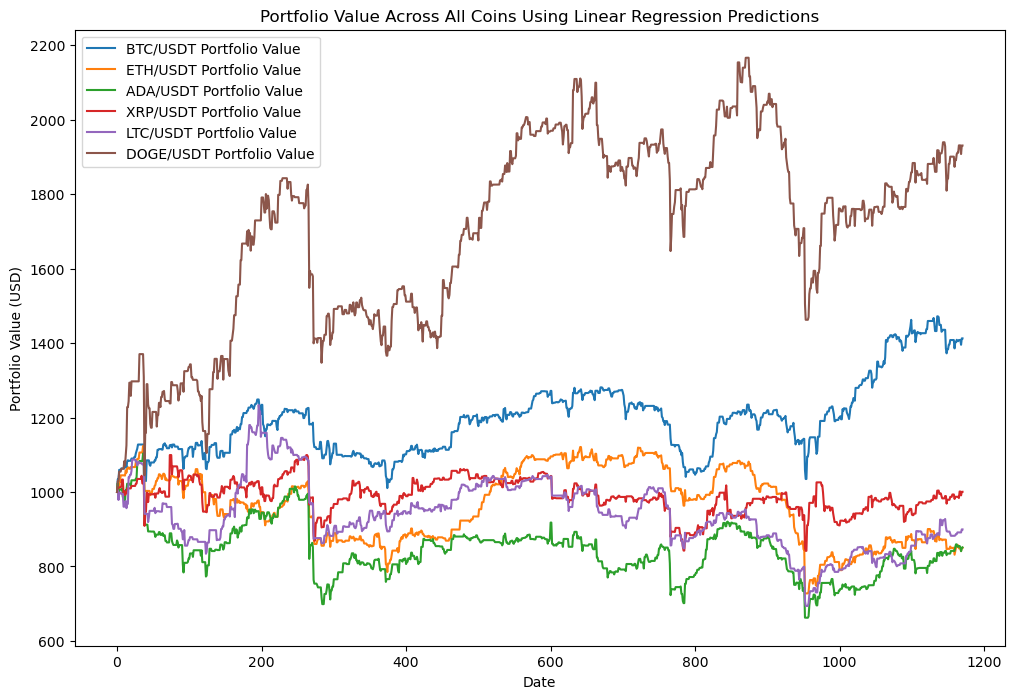

In [45]:
# Plot the results for all coins
plt.figure(figsize=(12, 8))

for symbol, result in strategy_results.items():
    plt.plot(result['df'].index, result['df']['portfolio_value'], label=f'{symbol} Portfolio Value')

plt.title('Portfolio Value Across All Coins Using Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.show()
